<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_%5B25_3%5D_Visualisasi_Klasifikasi_Linier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Visualisasi Bobot Klasifikasi Linier

## *Deep Representations*

Seperti yang telah dijelaskan sebelumnya, Salah satu intuisi alasan mengapa Jaringan yang dalam mampu mengatasi permasalahan lebih baik adalah dikarenakan Jaringan tersebut mampu membuat representasi permasalahan dengan lebih detil dan lebih baik

Sebagai contoh, misalkan kita membangun Jaringan Saraf Tiruan untuk mengenali identitas seseorang berdasarkan citra wajah. 

<img src="https://image.ibb.co/iOG8MK/deep_representation.jpg" alt="deep_representation"/>

Layer pertama pada Jaringan yang telah dilatih dengan ratusan dan ribuan citra mungkin akan bertindak lebih sebagai suatu pengenalan fitur atau *Edge Detection*, di mana setiap neuron mencoba mengenali orientasi garis yang berbeda. Kemudian terdapat layer berikutnya yang dilatih terhadap data garis hasil ekstraksi layer pertama dan menggabungkannya, dan mungkin membentuk suatu pengenalan fitur baru misalnya membentuk neuron yang mengenali fitur mata, hidung, dan lain sebagainya. Dan hal ini terus dilakukan untuk layer-layer berikutnya sehingga Jaringan dengan layer yang banyak dapat membentuk representasi fitur yang lebih detil.

Namun apakah benar demikian?
Mari kita selidiki

## Klasifikasi Linier Multi-kelas 

Misal kita ingin melakukan klasifikasi citra 10 kelas menggunakan dataset CIFAR-10

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Download data cifar-10 dari TensorFlow

In [2]:
import tensorflow as tf


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


Tampilkan 20 data pertama beserta kelasnya dari 50000 data latih

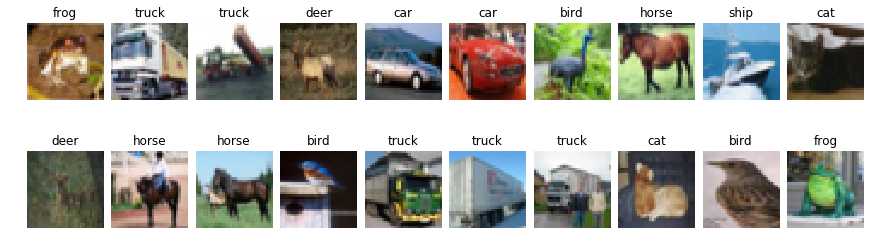

In [3]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

Selanjutnya kita akan mengklasifikasikan 10 kelas data cifar-10 menggunakan Klasifikasi Linier

Untuk itu, pertama kali kita preprocessing data dengan melakukan *zero-mean centering*

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_test -= mean_image

Pada Klasifikasi Linier, input harus diubah menjadi satu dimensi, 


<img src="https://i.ibb.co/HDTHkp9/linear-algebra.png" alt="klasifikasi linier"/>


karena itu, lakukan reshape

In [5]:
X_train_reshape = X_train.reshape(50000, 32*32*3)
X_test_reshape = X_test.reshape(10000, 32*32*3)

y_train_reshape = y_train.ravel()
y_test_reshape = y_test.ravel()

print('X_train:', X_train_reshape.shape)
print('X_test:', X_test_reshape.shape)

print('y_train:', y_train_reshape.shape)
print('y_test:', y_test_reshape.shape)

X_train: (50000, 3072)
X_test: (10000, 3072)
y_train: (50000,)
y_test: (10000,)


Selanjutnya kita lakukan pelatihan Klasifikasi Linier menggunakan library sklearn SGDClassifier

In [6]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', max_iter=2000, verbose=2, n_jobs=2,learning_rate='invscaling', eta0=1e-7)
clf.fit(X_train_reshape, y_train_reshape)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


-- Epoch 1
-- Epoch 1
Norm: 0.00, NNZs: 3072, Bias: -0.000018, T: 50000, Avg. loss: 0.673785
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3072, Bias: -0.000018, T: 50000, Avg. loss: 0.669250
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3072, Bias: -0.000025, T: 100000, Avg. loss: 0.668737
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3072, Bias: -0.000025, T: 100000, Avg. loss: 0.667269
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3072, Bias: -0.000031, T: 150000, Avg. loss: 0.667375
Total training time: 2.21 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3072, Bias: -0.000031, T: 150000, Avg. loss: 0.666907
Total training time: 2.34 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3072, Bias: -0.000036, T: 200000, Avg. loss: 0.666364
Total training time: 2.95 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3072, Bias: -0.000036, T: 200000, Avg. loss: 0.666610
Total training time: 3.09 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3072, Bias: -0.000

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   27.8s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1e-07, fit_intercept=True,
              l1_ratio=0.15, learning_rate='invscaling', loss='log',
              max_iter=2000, n_iter_no_change=5, n_jobs=2, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

Kita bisa mengecek akurasi dari model yang telah dilatih. 

Dapat dilihat bahwa akurasi masih kurang bagus dikarenakan kita hanya menggunakan klasifikasi linier atau Jaringan Saraf Tiruan satu layer

In [7]:
y_pred = clf.predict(X_test_reshape)

from sklearn.metrics import accuracy_score
print('akurasi =',accuracy_score(y_test_reshape, y_pred)*100,'%')

akurasi = 39.18 %


## Visualisasi Bobot

Selanjutnya mari kita ambil bobot yang telah dilatih dari model.

Perhatikan bahwa ukuran bobot adalah (10 x 3072)

In [8]:
weights = clf.coef_
print(weights.shape)

(10, 3072)


Mari kita pilih salah satu kelas untuk kita tampilkan bobotnya

In [9]:
class_id = 0

w0 = weights[class_id]
print(w0.shape)

(3072,)


Normalisasi terlebih dahulu nilai bobot ke dalam rentang 0-1 agar dapat divisualisasikan

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0.1,.9))
w0 = scaler.fit_transform(w0.reshape(-1, 1))

print(w0.shape)


(3072, 1)


Reshape kembali bobot ke ukuran (32x32) piksel

In [11]:
w0 = w0.reshape(32,32,3)
print(w0.shape)

(32, 32, 3)


Tampilkan bobotnya

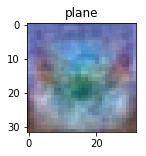

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(w0)
plt.title(classes[class_id])
plt.show()

Sekarang, mari kita tampilkan visualisasi keseluruhan bobot

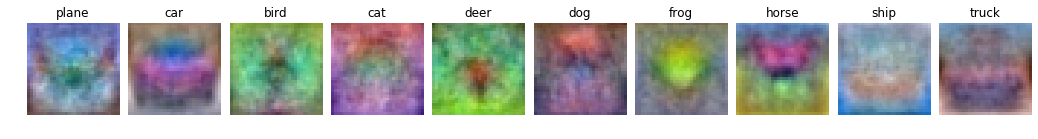

In [13]:
fig, ax = plt.subplots(1,10,figsize=(18,5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(0, 10):
    w = weights[i]
    
    w = scaler.fit_transform(w.reshape(-1, 1))
    
    w = w.reshape((32,32,3))
    
    ax[i].imshow(w)
    ax[i].axis('off')
    ax[i].set_title(classes[i])
plt.show()



```
# This is formatted as code
```

<p>Copyright &copy; 2019 ADF </p>